# 1. Introduction to the Problem Statement

The objective of this project is to analyze a dataset of laptop products scraped from an e-commerce website and identify the most significant factors mentioned in the product descriptions that influence the laptop prices. This will be achieved by using data analytics tools to extract insights from the dataset, allowing the e-commerce website to make informed decisions around pricing and product development, improve customer satisfaction and loyalty, stay competitive in the market, and optimize their resources.

*   The rating of a laptop will be predicted by it's features. This will educate not only the manufacturers but also the buyers to gauge the opinion of the general public and make a better choice. By knowing which feature(s) affects the product rating the most, one can decide what to priortize the most while buying a laptop.
*   We can make use of data from an E-Commerce site/platform for this problem
*   I tried seacrhing for online shopping websites like flipkart, amazon. As the format and information available on each site is quite different, I had to settle with scarping the webpages on one website (flipkart). 
*   Descriptive and/or Inferential data analysis has been performed
 


# 2. Data Acquisition
 




## 2.1 Code for scraping data from website

In [ ]:
from bs4 import BeautifulSoup
import requests
import re

In [ ]:
def append_fun(element, list_name):
  if element is None:
    list_name.append('Null')
  else :
    list_name.append(element)

In [ ]:

brand_names = ['ASUS', 'HP', 'Lenovo', 'Infinix', 'DELL', 'REDMI', 'acer', 'MSI', 'APPLE', 'Avita', 'realme', 'Nokia', 'SAMSUNG', 'MICROSOFT', 'ALIENWARE', 'LG', 'Mi', 'Vaio']

Processor_names = ['Core i5', 'Core i3', 'Core i7', 'Ryzen 7 Quad Core', 'Ryzen 5 Quad Core', 'Core i9', 'Ryzen 5 Hexa Core', 'Ryzen 7 Octa Core','Dual Core', 'Hexa Core i5', 
                   'M1 Pro', 'Pentium Quad Core', 'Pentium Silver', 'Ryzen 3 Quad Core', 'Ryzen 5 Dual Core', 
                   'Ryzen 5 Octa Core', 'Ryzen 7 Hexa Core', 'Ryzen 9 Octa Core', 'Snapdragon 7c Gen 2']

ram_type_names = ['DDR4', 'LPDDR5', 'LPDDR3', 'DDR3', 'LPDDR4', 'DDR5', 'LPDDR4X']

ram_capacity_names = ['8 GB', '4 GB', '16 GB', '2 GB']

OS_names = ['Windows 10', 'Mac OS', 'DOS', 'Windows 8.1', 'Linux/Ubuntu', 'Chrome', 'Windows 11']

SSD_names = ['512 GB', '256 GB', '8 GB', '1 TB', '2 TB']


In [ ]:
print(len(brand_names))
print(len(Processor_names))
print(len(ram_type_names))
print(len(ram_capacity_names))
print(len(OS_names))
print(len(SSD_names))

18
19
7
4
7
5


In [ ]:
names=[] #List to store name of the product
processors=[]
ram_types = []
ram_capacitys = []
oss = []
ssds = []
displays = []
warrantys = []
prices=[] #List to store price of the product
ratings=[] #List to store rating of the product
rating_values = []
offers=[]

for page in range(1,46):

  url = "https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}".format(page)
  req=requests.get(url)
  content=req.text

  soup = BeautifulSoup(content)

  for a in soup.findAll('div', attrs={'class':'_3pLy-c row'}):

    name_element = a.find('div', attrs={'class':'_4rR01T'})

    for brand_name in brand_names:
      if brand_name in name_element.text:
        name = brand_name
      elif 'lenovo' in name_element.text:
        name = 'Lenovo'
      elif 'RedmiBook' in name_element.text:
        name = 'REDMI'

    specification = list(a.find_all('li', attrs={'class':'rgWa7D'}))

    processor = None
    ram = None
    os = None
    ssd = None
    display = None
    warranty = None

    for list_element in specification:

      if 'Processor' in list_element.text:
        for Processor_name in Processor_names:
          if Processor_name in list_element.text:
            processor = Processor_name

      elif 'RAM' in list_element.text:
        ram = list_element

        for ram_type in ram_type_names:
          if re.search(r'\b' + ram_type + r'\b', list_element.text):
            ram_type_ = ram_type
        
        for ram_capacity in ram_capacity_names:
          if ram_capacity in list_element.text:
            ram_capacity_ = ram_capacity

      elif 'Operating System' in list_element.text:
        for OS in OS_names:
          if OS in list_element.text:
            OS_ = OS

      elif 'SSD' in list_element.text:
        if 'HDD' in list_element.text:
          ssd_string = list_element.text[(list_element.text).find('HDD'):]
        else:
          ssd_string = list_element.text

        for SSD in SSD_names:
          if SSD in ssd_string:
            ssd_ = SSD

      elif 'Display' in list_element.text:
        
        display_string = ((list_element.text)[(list_element.text).find('('):]).replace(((list_element.text)[(list_element.text).find('('):])[((list_element.text)[(list_element.text).find('('):]).find(')'):], '')   
 
        if (len(re.findall(r"[-+]?\d*\.\d+|\d+", display_string)) != 0):

          display_float = float((re.findall(r"[-+]?\d*\.\d+|\d+", display_string))[0])
          if (display_float < 12):
            display = 'Below 12 inch'
          elif (display_float >= 13) and (display_float < 14):
            display = '13 inch - 14 inch'
          elif (display_float >= 14) and (display_float < 15):
            display = '14 inch - 15 inch'
          elif (display_float >= 15) and (display_float < 16):
            display = '15 inch - 16 inch'
          elif (display_float >= 16) and (display_float <= 18):
            display = '16 inch - 18 inch'

      elif 'Warranty' in list_element.text:
        warranty = str(list_element.text)

    price_element = (a.find('div', attrs={'class':'_30jeq3 _1_WHN1'})).text
    price_integer = int(float((price_element.replace('₹','')).replace(',','')))

    price_ranges = ['Below ₹20,000', '₹20,000 to ₹45,000', '₹45,000 to ₹70,000', '₹70,000 to ₹95,000', '₹95,000 to ₹1,20,000', '₹1,20,000 to ₹1,75,000', 
                '₹1,75,000 to ₹2,00,000', '₹2,00,000 to ₹2,50,000', '₹2,50,000 to ₹3,00,000', 'Above ₹3,00,000']

    if (price_integer < 35000):
      price = 'Below ₹35,000'
    elif (price_integer >= 35000) and (price_integer < 50000):
      price = '₹35,000 to ₹50,000'
    elif (price_integer >= 50000) and (price_integer < 60000):
      price = '₹50,000 to ₹60,000'
    elif (price_integer >= 60000) and (price_integer < 80000):
      price = '₹60,000 to ₹80,000'
    elif (price_integer >= 80000) and (price_integer < 95000):
      price = '₹80,000 to ₹95,000'
    elif (price_integer >= 95000) and (price_integer < 120000):
      price = '₹95,000 to ₹1,20,000'
    elif (price_integer >= 120000):
      price = 'Above ₹1,20,000'

    if a.find('div', attrs={'class':'_3LWZlK'}) != None:
      rating_float = float((a.find('div', attrs={'class':'_3LWZlK'})).text)
      if (rating_float >= 2) and (rating_float <= 4):
        rating = '2 to 4'
      elif (rating_float >= 4) and (rating_float <= 4.2):
        rating = '4 to 4.2'
      elif (rating_float >= 4.2) and (rating_float <= 4.3):
        rating = '4.2 to 4.3'
      elif (rating_float >= 4.3) and (rating_float <= 4.4):
        rating = '4.3 to 4.4'
      elif (rating_float >= 4.4) and (rating_float <= 4.5):
        rating = '4.4 to 4.5'
      elif (rating_float >= 4.5) and (rating_float <= 5):
        rating = '4.5 to 5'

    offer_element = a.find('div', attrs={'class':'_3Ay6Sb'})
    if offer_element != None:
      offer_string = offer_element.text
      offer_integer = int((re.findall(r"[-+]?\d*\.\d+|\d+", offer_string))[0])
      if (offer_integer <= 10):
        offer = '10% and below'
      elif (offer_integer > 10) and (offer_integer <= 20):
        offer = '10% to 20%'
      elif (offer_integer > 20) and (offer_integer <= 30):
        offer = '20% to 30%'
      elif (offer_integer > 30) and (offer_integer <= 40):
        offer = '30% to 40%'
      elif (offer_integer > 40) and (offer_integer < 50):
        offer = '40% to 50%'

    append_fun(name, names)
    append_fun(processor, processors)
    append_fun(ram_type_,ram_types)
    append_fun(ram_capacity_, ram_capacitys)
    append_fun(OS_,oss)
    append_fun(ssd_,ssds) 
    append_fun(display, displays) 
    append_fun(warranty, warrantys)
    append_fun(price, prices)
    append_fun(rating, ratings)
    append_fun(rating_float, rating_values)
    append_fun(offer, offers)

In [ ]:
print(len(ratings))
print(len(rating_values))

960
960


## 2.2 Code for converting the above scraped data into a dataframe

In [ ]:
##---------Type the code below this line------------------##
import pandas as pd
df = pd.DataFrame(list(zip(names, processors, ram_types, ram_capacitys, oss, ssds, displays, prices, offers, ratings)), 
                  columns =['Brand', 'Processor', 'RAM_type', 'RAM_capacity', 'OS', 'SSD_capacity', 'Display', 'Price_Range', 'Discount', 'Rating'])
df_with_rating_value = pd.DataFrame(list(zip(names, processors, ram_types, ram_capacitys, oss, ssds, displays, prices, offers, ratings, rating_values)), 
                  columns =['Brand', 'Processor', 'RAM_type', 'RAM_capacity', 'OS', 'SSD_capacity', 'Display', 'Price_Range', 'Discount', 'Rating', 'Rating_values'])


## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [ ]:
##---------Type the code below this line------------------##
from IPython.display import display
display(df.head(5))

,Brand,Processor,RAM_type,RAM_capacity,OS,SSD_capacity,Display,Price_Range,Discount,Rating
0,Lenovo,Core i3,DDR4,8 GB,Windows 11,512 GB,15 inch - 16 inch,"₹35,000 to ₹50,000",30% to 40%,4.2 to 4.3
1,DELL,Core i3,DDR4,8 GB,Windows 11,512 GB,15 inch - 16 inch,"Below ₹35,000",30% to 40%,2 to 4
2,Lenovo,Core i3,DDR4,8 GB,Windows 11,256 GB,15 inch - 16 inch,"Below ₹35,000",30% to 40%,4.2 to 4.3
3,DELL,Dual Core,DDR4,8 GB,Windows 11,256 GB,15 inch - 16 inch,"Below ₹35,000",30% to 40%,4 to 4.2
4,DELL,Core i3,DDR4,8 GB,Windows 11,256 GB,14 inch - 15 inch,"₹35,000 to ₹50,000",30% to 40%,4 to 4.2


In [ ]:
display(df.tail(5))

,Brand,Processor,RAM_type,RAM_capacity,OS,SSD_capacity,Display,Price_Range,Discount,Rating
955,ASUS,Core i7,DDR4,8 GB,Windows 10,512 GB,14 inch - 15 inch,"₹80,000 to ₹95,000",10% to 20%,4.2 to 4.3
956,Lenovo,Ryzen 7 Octa Core,DDR4,16 GB,Windows 10,512 GB,13 inch - 14 inch,"₹60,000 to ₹80,000",10% to 20%,4.4 to 4.5
957,MSI,Core i7,LPDDR4X,16 GB,Windows 10,512 GB,14 inch - 15 inch,"₹60,000 to ₹80,000",20% to 30%,4.4 to 4.5
958,ASUS,Core i7,LPDDR5,16 GB,Windows 11,1 TB,15 inch - 16 inch,"Above ₹1,20,000",10% to 20%,4.4 to 4.5
959,Lenovo,Ryzen 7 Octa Core,DDR4,16 GB,Windows 10,512 GB,14 inch - 15 inch,"₹95,000 to ₹1,20,000",20% to 30%,4.4 to 4.5


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [ ]:
##---------Type the code below this line------------------##
print(df.columns.values.tolist())
print(df.shape)
print(df.dtypes)
display(df.describe())

['Brand', 'Processor', 'RAM_type', 'RAM_capacity', 'OS', 'SSD_capacity', 'Display', 'Price_Range', 'Discount', 'Rating']
(960, 10)
Brand           object
Processor       object
RAM_type        object
RAM_capacity    object
OS              object
SSD_capacity    object
Display         object
Price_Range     object
Discount        object
Rating          object
dtype: object


,Brand,Processor,RAM_type,RAM_capacity,OS,SSD_capacity,Display,Price_Range,Discount,Rating
count,960,960,960,960,960,960,960,960,960,960
unique,17,20,7,4,6,5,5,7,5,6
top,ASUS,Core i5,DDR4,8 GB,Windows 10,512 GB,15 inch - 16 inch,"₹35,000 to ₹50,000",20% to 30%,2 to 4
freq,278,325,825,545,526,574,512,237,352,200


In [ ]:
num_nulls= 0

for row_num in range(0, df.shape[0]):
  for column_num in range(0, df.shape[1]):
    if (df.iloc[row_num, column_num] == 'Null'):
        num_nulls += 1

print(num_nulls)

9


## 2.5 Preliminary Observations


# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [ ]:
##---------Type the code below this line------------------##
print(df.nunique())

Brand           17
Processor       20
RAM_type         7
RAM_capacity     4
OS               6
SSD_capacity     5
Display          5
Price_Range      7
Discount         5
Rating           6
dtype: int64


## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes.

In [ ]:
##---------Type the code below this line------------------##
num_dupli = df[df.duplicated(keep=False)].shape[0]
print(df.duplicated().any())
print('There are', num_dupli, 'duplicate entries in the dataset')

True
There are 321 duplicate entries in the dataset


Since every row of this dataset is a unique combination of non-related attributes, we will drop the entire duplicate rows using 'drop_duplicates' function

In [ ]:
df_with_rating_value.drop_duplicates(subset=['Brand', 'Processor', 'RAM_type', 'RAM_capacity', 'OS', 'SSD_capacity',	'Display',	'Price_Range',	'Discount',	'Rating'], inplace=True)
rating_values_list = df_with_rating_value['Rating_values'].tolist()
df_with_rating_value.drop("Rating_values", axis=1, inplace=True)

In [ ]:
df = df_with_rating_value.reset_index(drop=True)
display(df)

,Brand,Processor,RAM_type,RAM_capacity,OS,SSD_capacity,Display,Price_Range,Discount,Rating
0,Lenovo,Core i3,DDR4,8 GB,Windows 11,512 GB,15 inch - 16 inch,"₹35,000 to ₹50,000",30% to 40%,4.2 to 4.3
1,DELL,Core i3,DDR4,8 GB,Windows 11,512 GB,15 inch - 16 inch,"Below ₹35,000",30% to 40%,2 to 4
2,Lenovo,Core i3,DDR4,8 GB,Windows 11,256 GB,15 inch - 16 inch,"Below ₹35,000",30% to 40%,4.2 to 4.3
3,DELL,Dual Core,DDR4,8 GB,Windows 11,256 GB,15 inch - 16 inch,"Below ₹35,000",30% to 40%,4 to 4.2
4,DELL,Core i3,DDR4,8 GB,Windows 11,256 GB,14 inch - 15 inch,"₹35,000 to ₹50,000",30% to 40%,4 to 4.2
...,...,...,...,...,...,...,...,...,...,...
766,ASUS,Core i7,DDR4,8 GB,Windows 10,512 GB,14 inch - 15 inch,"₹80,000 to ₹95,000",10% to 20%,4.2 to 4.3
767,Lenovo,Ryzen 7 Octa Core,DDR4,16 GB,Windows 10,512 GB,13 inch - 14 inch,"₹60,000 to ₹80,000",10% to 20%,4.4 to 4.5
768,MSI,Core i7,LPDDR4X,16 GB,Windows 10,512 GB,14 inch - 15 inch,"₹60,000 to ₹80,000",20% to 30%,4.4 to 4.5
769,ASUS,Core i7,LPDDR5,16 GB,Windows 11,1 TB,15 inch - 16 inch,"Above ₹1,20,000",10% to 20%,4.4 to 4.5


## 3.3 Check for any missing values in each attribute. 


Missing values are replaced by the string 'Null' as placeholder

In [ ]:
##---------Type the code below this line------------------##
num_nulls = 0

for row_num in range(0, df.shape[0]):
  for column_num in range(0, df.shape[1]):
    if (df.iloc[row_num, column_num] == 'Null'):
        num_nulls += 1
        display(df.iloc[row_num])
        print('----------------------------------')

print(num_nulls)

Brand                       APPLE
Processor                    Null
RAM_type                     DDR4
RAM_capacity                 8 GB
OS                         Mac OS
SSD_capacity               512 GB
Display         13 inch - 14 inch
Price_Range       Above ₹1,20,000
Discount               30% to 40%
Rating                 4.2 to 4.3
Name: 188, dtype: object

----------------------------------


Brand                       APPLE
Processor                    Null
RAM_type                     DDR4
RAM_capacity                 8 GB
OS                         Mac OS
SSD_capacity               256 GB
Display         13 inch - 14 inch
Price_Range       Above ₹1,20,000
Discount               30% to 40%
Rating                 4.4 to 4.5
Name: 189, dtype: object

----------------------------------


Brand                           HP
Processor                     Null
RAM_type                      DDR4
RAM_capacity                  8 GB
OS                      Windows 10
SSD_capacity                512 GB
Display          15 inch - 16 inch
Price_Range     ₹60,000 to ₹80,000
Discount                10% to 20%
Rating                  4.2 to 4.3
Name: 194, dtype: object

----------------------------------


Brand                       APPLE
Processor                    Null
RAM_type                     DDR4
RAM_capacity                 8 GB
OS                         Mac OS
SSD_capacity               512 GB
Display         13 inch - 14 inch
Price_Range       Above ₹1,20,000
Discount               20% to 30%
Rating                 4.3 to 4.4
Name: 211, dtype: object

----------------------------------


Brand                       APPLE
Processor                    Null
RAM_type                     DDR4
RAM_capacity                 8 GB
OS                         Mac OS
SSD_capacity               512 GB
Display         13 inch - 14 inch
Price_Range       Above ₹1,20,000
Discount               40% to 50%
Rating                 4.3 to 4.4
Name: 223, dtype: object

----------------------------------


Brand                       APPLE
Processor                    Null
RAM_type                     DDR4
RAM_capacity                 8 GB
OS                         Mac OS
SSD_capacity               256 GB
Display         13 inch - 14 inch
Price_Range       Above ₹1,20,000
Discount               40% to 50%
Rating                 4.3 to 4.4
Name: 224, dtype: object

----------------------------------


Brand                      HP
Processor                Null
RAM_type                 DDR4
RAM_capacity             4 GB
OS                     Chrome
SSD_capacity           512 GB
Display         Below 12 inch
Price_Range     Below ₹35,000
Discount           20% to 30%
Rating                 2 to 4
Name: 393, dtype: object

----------------------------------


Brand                      HP
Processor                Null
RAM_type              LPDDR4X
RAM_capacity             4 GB
OS                     Chrome
SSD_capacity           256 GB
Display         Below 12 inch
Price_Range     Below ₹35,000
Discount           10% to 20%
Rating                 2 to 4
Name: 418, dtype: object

----------------------------------


Brand                          HP
Processor                    Null
RAM_type                   LPDDR4
RAM_capacity                 4 GB
OS                         Chrome
SSD_capacity                 1 TB
Display         14 inch - 15 inch
Price_Range         Below ₹35,000
Discount               20% to 30%
Rating                     2 to 4
Name: 592, dtype: object

----------------------------------
9


therefore the number of missing values is equal to 3, all of the attribute 'Processor'

## 3.4 Clean the missing data using an imputation technique

Frequency Category Imputation method is used

In [ ]:
##---------Type the code below this line------------------##
print(df['Processor'].value_counts().idxmax())

Core i5


In [ ]:
for row_num in range(0, df.shape[0]):
  for column_num in range(0, df.shape[1]):
    if (df.iloc[row_num, column_num] == 'Null'):
        df.iloc[row_num, column_num] = 'Core i5'

In [ ]:
num_nulls_ = 0

for row_num in range(0, df.shape[0]):
  for column_num in range(0, df.shape[1]):
    if (df.iloc[row_num, column_num] == 'Null'):
        num_nulls_ += 1
        display(df.iloc[row_num])
        print('----------------------------------')

print(num_nulls_)

0


The number of missing values is zero after cleaning

## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [ ]:
##---------Type the code below this line------------------##
for column_num in range(0, df.shape[1]):
  dtype = type(df.iloc[0, column_num])
  for row_num in range(0, df.shape[0]):
    if (type(df.iloc[row_num, column_num]) != dtype):
      print('inconsistency in format')

All the attributes are in same format

## 3.6 Identify the target variables.


Target variables should have a fairly uniform distribution

Given the problem statement, the two contenders of target variables are 'Price Range' and 'Rating'

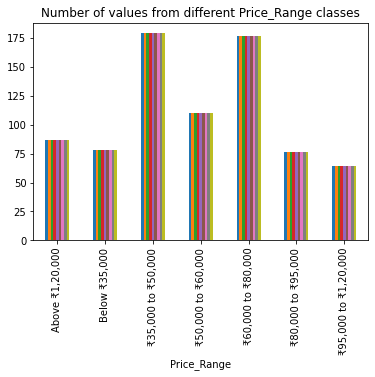

In [ ]:
##---------Type the code below this line------------------##
import matplotlib.pyplot as plt
bar_graph = df.groupby('Price_Range').count().plot(kind='bar', title='Number of values from different Price_Range classes',
                                               legend=False)

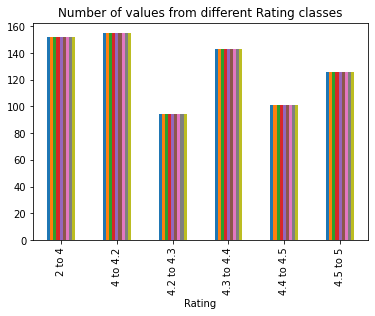

In [ ]:
bar_graph_ = df.groupby('Rating').count().plot(kind='bar', title='Number of values from different Rating classes',
                                               legend=False)

'Rating' is a good choice of target variable

## 3.7 Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)


In [ ]:
##---------Type the code below this line------------------##
y = pd.DataFrame([df['Rating']]).T
display(y)

,Rating
0,4.2 to 4.3
1,2 to 4
2,4.2 to 4.3
3,4 to 4.2
4,4 to 4.2
...,...
766,4.2 to 4.3
767,4.4 to 4.5
768,4.4 to 4.5
769,4.4 to 4.5


In [ ]:
X = df[['Brand', 'Processor', 'RAM_type',	'RAM_capacity', 'OS',	'SSD_capacity', 'Display', 'Price_Range', 'Discount']]
display(X)

,Brand,Processor,RAM_type,RAM_capacity,OS,SSD_capacity,Display,Price_Range,Discount
0,Lenovo,Core i3,DDR4,8 GB,Windows 11,512 GB,15 inch - 16 inch,"₹35,000 to ₹50,000",30% to 40%
1,DELL,Core i3,DDR4,8 GB,Windows 11,512 GB,15 inch - 16 inch,"Below ₹35,000",30% to 40%
2,Lenovo,Core i3,DDR4,8 GB,Windows 11,256 GB,15 inch - 16 inch,"Below ₹35,000",30% to 40%
3,DELL,Dual Core,DDR4,8 GB,Windows 11,256 GB,15 inch - 16 inch,"Below ₹35,000",30% to 40%
4,DELL,Core i3,DDR4,8 GB,Windows 11,256 GB,14 inch - 15 inch,"₹35,000 to ₹50,000",30% to 40%
...,...,...,...,...,...,...,...,...,...
766,ASUS,Core i7,DDR4,8 GB,Windows 10,512 GB,14 inch - 15 inch,"₹80,000 to ₹95,000",10% to 20%
767,Lenovo,Ryzen 7 Octa Core,DDR4,16 GB,Windows 10,512 GB,13 inch - 14 inch,"₹60,000 to ₹80,000",10% to 20%
768,MSI,Core i7,LPDDR4X,16 GB,Windows 10,512 GB,14 inch - 15 inch,"₹60,000 to ₹80,000",20% to 30%
769,ASUS,Core i7,LPDDR5,16 GB,Windows 11,1 TB,15 inch - 16 inch,"Above ₹1,20,000",10% to 20%


## 3.8 Discretize the target variable or perform one-hot encoding on the target


In [ ]:
##---------Type the code below this line------------------##
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in y:
  y[i] = le.fit_transform(y[i])

display(y.head())

print(list(le.classes_))

,Rating
0,2
1,0
2,2
3,1
4,1


['2 to 4', '4 to 4.2', '4.2 to 4.3', '4.3 to 4.4', '4.4 to 4.5', '4.5 to 5']


# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

In [ ]:
##---------Type the code below this line------------------##
le1 = LabelEncoder()
X['Brand'] = le1.fit_transform(X['Brand'])
print(list(le1.classes_))

le2 = LabelEncoder()
X['Processor'] = le2.fit_transform(X['Processor'])
print(list(le2.classes_))

le3 = LabelEncoder()
X['RAM_type'] = le3.fit_transform(X['RAM_type'])
print(list(le3.classes_))

le4 = LabelEncoder()
X['RAM_capacity'] = le4.fit_transform(X['RAM_capacity'])
print(list(le4.classes_))

le5 = LabelEncoder()
X['OS'] = le5.fit_transform(X['OS'])
print(list(le5.classes_))

le6 = LabelEncoder()
X['SSD_capacity'] = le6.fit_transform(X['SSD_capacity'])
print(list(le6.classes_))

le7 = LabelEncoder()
X['Display'] = le7.fit_transform(X['Display'])
print(list(le7.classes_))

le8 = LabelEncoder()
X['Price_Range'] = le8.fit_transform(X['Price_Range'])
print(list(le8.classes_))

le9 = LabelEncoder()
X['Discount'] = le9.fit_transform(X['Discount'])
print(list(le9.classes_))

['ALIENWARE', 'APPLE', 'ASUS', 'Avita', 'DELL', 'HP', 'Infinix', 'LG', 'Lenovo', 'MSI', 'Mi', 'Nokia', 'REDMI', 'SAMSUNG', 'Vaio', 'acer', 'realme']
['Core i3', 'Core i5', 'Core i7', 'Core i9', 'Dual Core', 'Hexa Core i5', 'M1 Pro', 'Pentium Quad Core', 'Pentium Silver', 'Ryzen 3 Quad Core', 'Ryzen 5 Dual Core', 'Ryzen 5 Hexa Core', 'Ryzen 5 Octa Core', 'Ryzen 5 Quad Core', 'Ryzen 7 Hexa Core', 'Ryzen 7 Octa Core', 'Ryzen 7 Quad Core', 'Ryzen 9 Octa Core', 'Snapdragon 7c Gen 2']
['DDR3', 'DDR4', 'DDR5', 'LPDDR3', 'LPDDR4', 'LPDDR4X', 'LPDDR5']
['16 GB', '2 GB', '4 GB', '8 GB']
['Chrome', 'DOS', 'Linux/Ubuntu', 'Mac OS', 'Windows 10', 'Windows 11']
['1 TB', '2 TB', '256 GB', '512 GB', '8 GB']
['13 inch - 14 inch', '14 inch - 15 inch', '15 inch - 16 inch', '16 inch - 18 inch', 'Below 12 inch']
['Above ₹1,20,000', 'Below ₹35,000', '₹35,000 to ₹50,000', '₹50,000 to ₹60,000', '₹60,000 to ₹80,000', '₹80,000 to ₹95,000', '₹95,000 to ₹1,20,000']
['10% and below', '10% to 20%', '20% to 30%', '3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

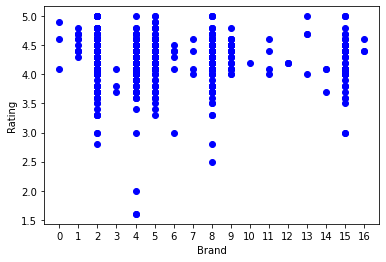

In [ ]:
x_axis_labels = []
for i in range(len(list(le1.classes_))):
  x_axis_labels.append(i)

fig, ax = plt.subplots()
plt.scatter(X['Brand'].values.tolist(), rating_values_list, c ="blue")
plt.xticks(x_axis_labels)
plt.xlabel("Brand")
plt.ylabel("Rating")
plt.show()

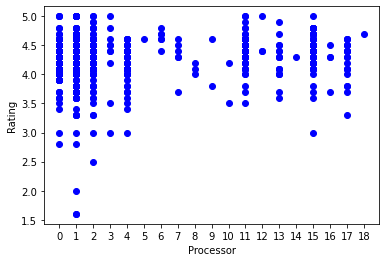

In [ ]:
x_axis_labels = []
for i in range(len(list(le2.classes_))):
  x_axis_labels.append(i)

fig, ax = plt.subplots()
plt.scatter(X['Processor'].values.tolist(), rating_values_list, c ="blue")
plt.xticks(x_axis_labels)
plt.xlabel('Processor')
plt.ylabel("Rating")
plt.show()

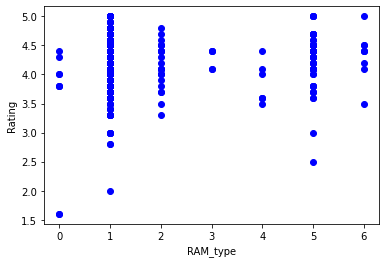

In [ ]:
x_axis_labels = []
for i in range(len(list(le3.classes_))):
  x_axis_labels.append(i)

fig, ax = plt.subplots()
plt.scatter(X['RAM_type'].values.tolist(), rating_values_list, c ="blue")
plt.xticks(x_axis_labels)
plt.xlabel('RAM_type')
plt.ylabel("Rating")
plt.show()

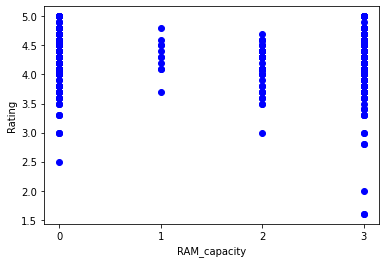

In [ ]:
x_axis_labels = []
for i in range(len(list(le4.classes_))):
  x_axis_labels.append(i)

fig, ax = plt.subplots()
plt.scatter(X['RAM_capacity'].values.tolist(), rating_values_list, c ="blue")
plt.xticks(x_axis_labels)
plt.xlabel('RAM_capacity')
plt.ylabel("Rating")
plt.show()

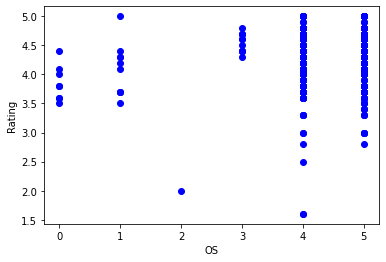

In [ ]:
x_axis_labels = []
for i in range(len(list(le5.classes_))):
  x_axis_labels.append(i)

fig, ax = plt.subplots()
plt.scatter(X['OS'].values.tolist(), rating_values_list, c ="blue")
plt.xticks(x_axis_labels)
plt.xlabel('OS')
plt.ylabel("Rating")
plt.show()

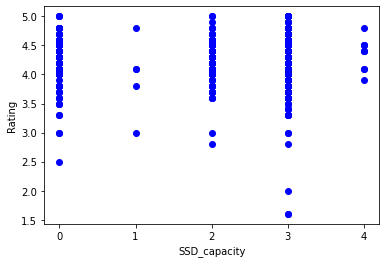

In [ ]:
x_axis_labels = []
for i in range(len(list(le6.classes_))):
  x_axis_labels.append(i)

fig, ax = plt.subplots()
plt.scatter(X['SSD_capacity'].values.tolist(), rating_values_list, c ="blue")
plt.xticks(x_axis_labels)
plt.xlabel('SSD_capacity')
plt.ylabel("Rating")
plt.show()

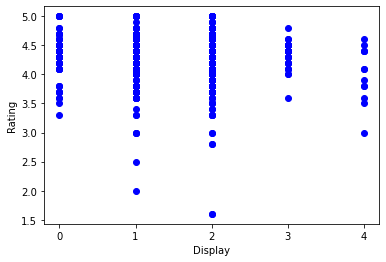

In [ ]:
x_axis_labels = []
for i in range(len(list(le7.classes_))):
  x_axis_labels.append(i)

fig, ax = plt.subplots()
plt.scatter(X['Display'].values.tolist(), rating_values_list, c ="blue")
plt.xticks(x_axis_labels)
plt.xlabel('Display')
plt.ylabel("Rating")
plt.show()

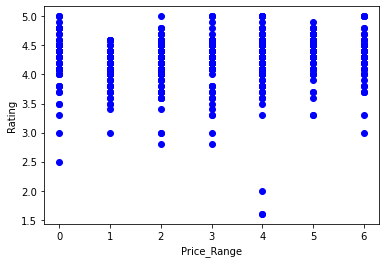

In [ ]:
x_axis_labels = []
for i in range(len(list(le8.classes_))):
  x_axis_labels.append(i)

fig, ax = plt.subplots()
plt.scatter(X['Price_Range'].values.tolist(), rating_values_list, c ="blue")
plt.xticks(x_axis_labels)
plt.xlabel('Price_Range')
plt.ylabel("Rating")
plt.show()

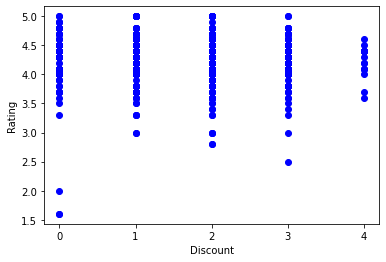

In [ ]:
x_axis_labels = []
for i in range(len(list(le9.classes_))):
  x_axis_labels.append(i)

fig, ax = plt.subplots()
plt.scatter(X['Discount'].values.tolist(), rating_values_list, c ="blue")
plt.xticks(x_axis_labels)
plt.xlabel('Discount')
plt.ylabel("Rating")
plt.show()

## 4.2 Plotting Pair plot and Regression plot (if possible) of each attribute to identify the linear relationships among the attributes


Pair plot not possible as all the data is non-numeric and categorical

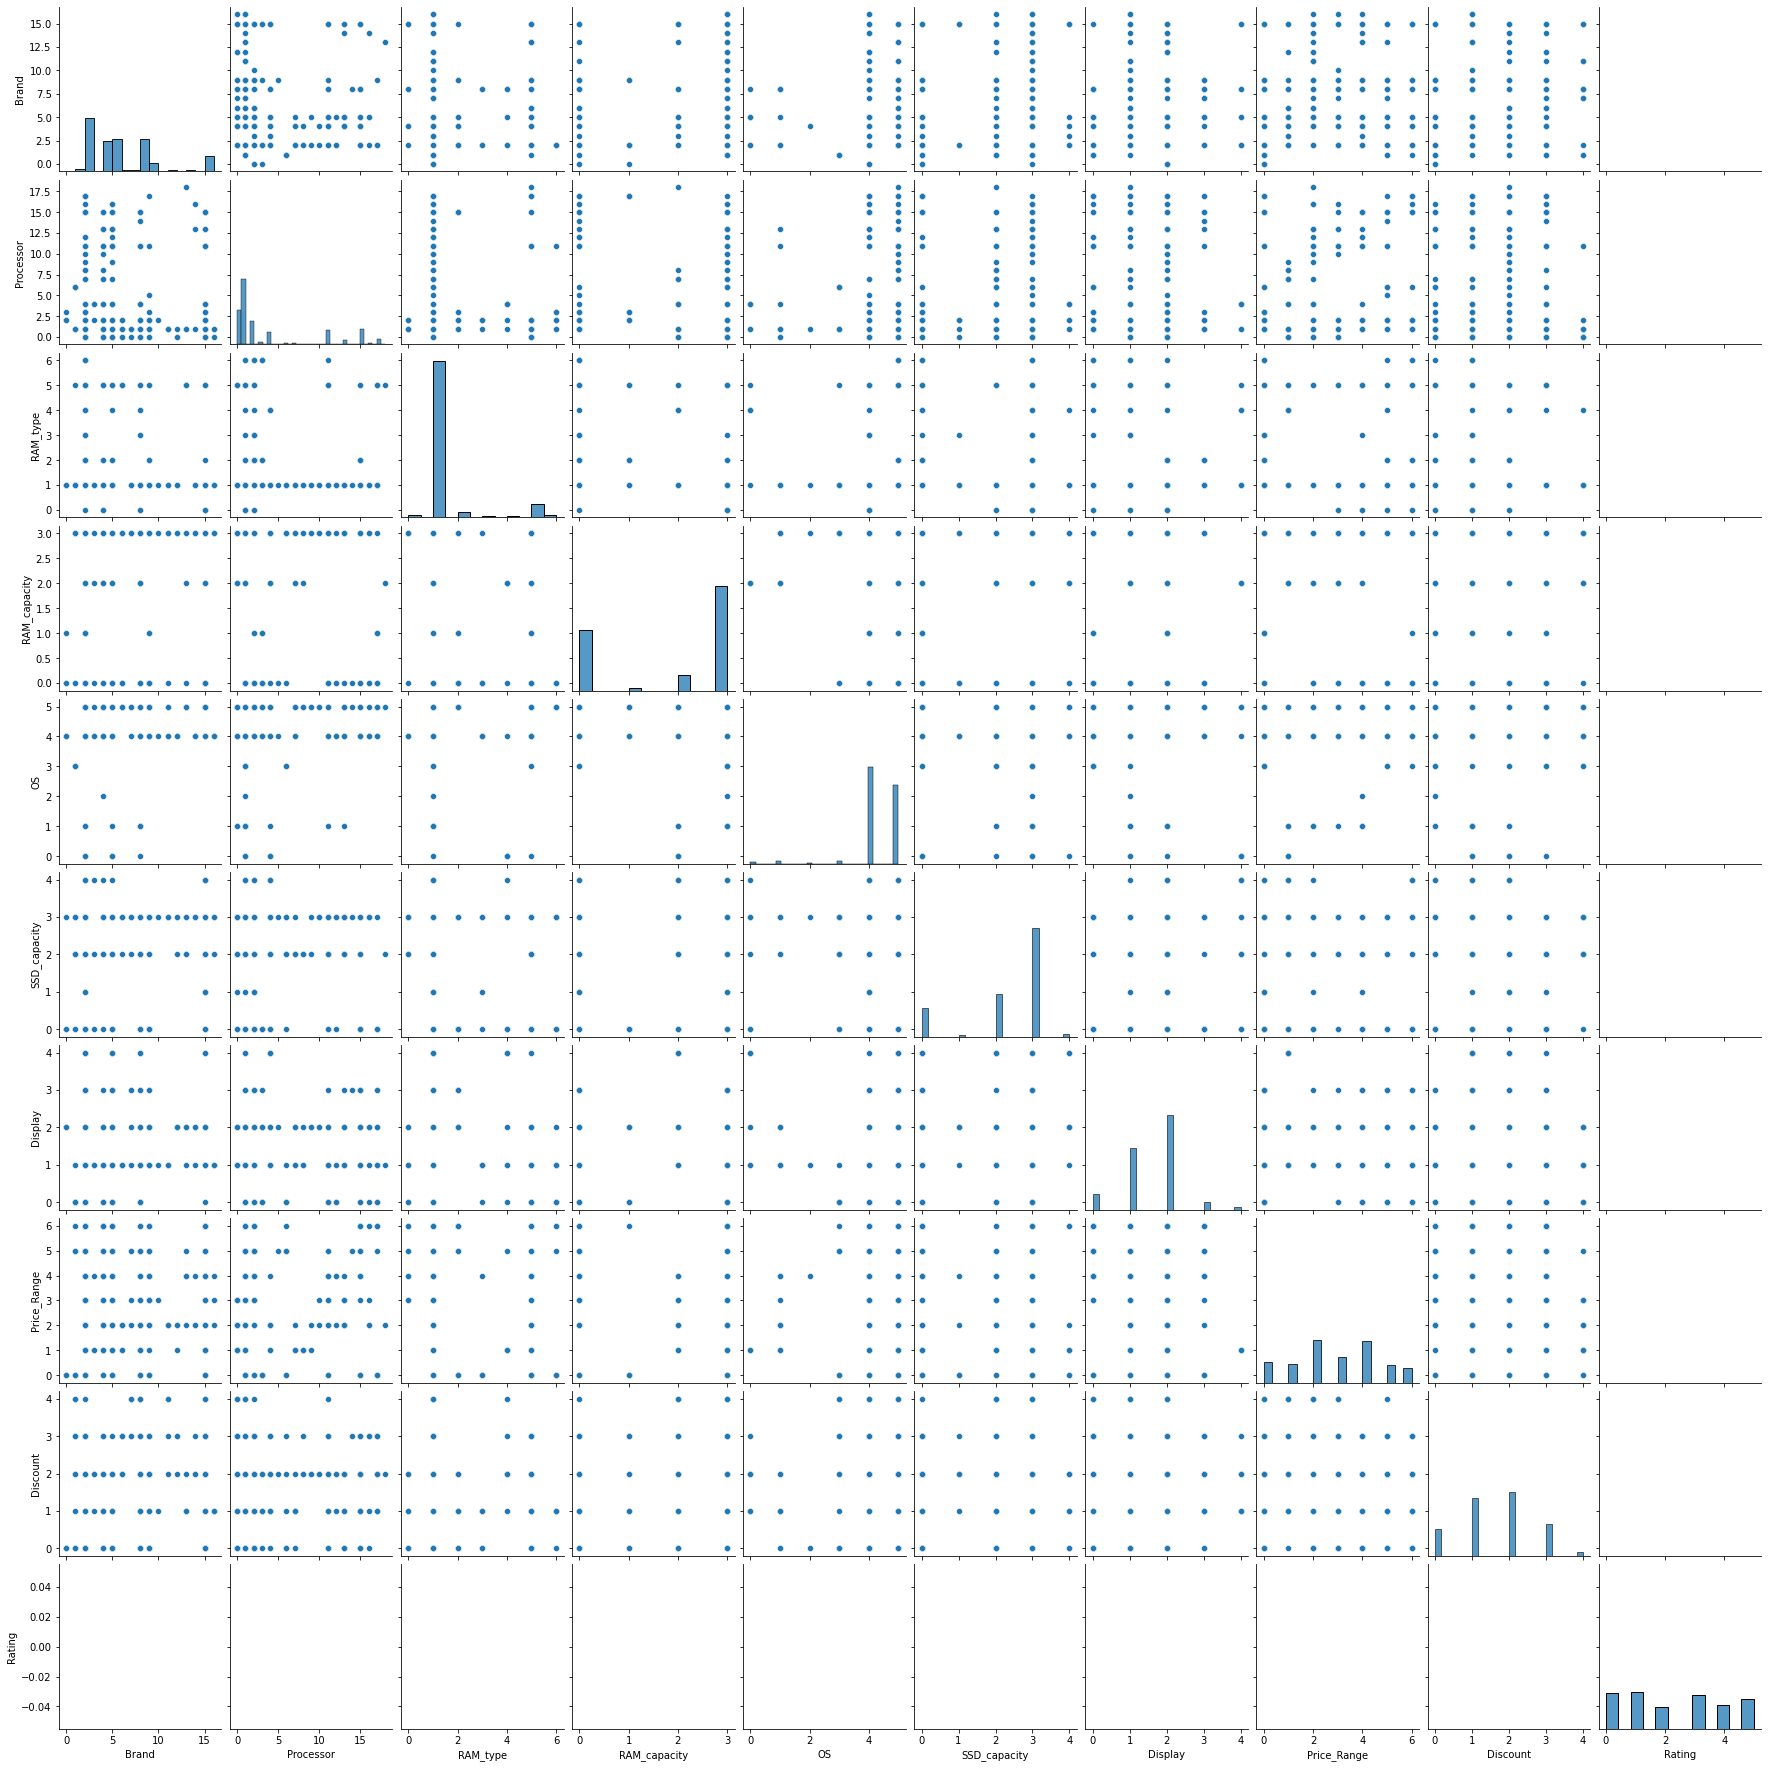

In [ ]:
##---------Type the code below this line------------------##
import seaborn as sns
sns.pairplot(X.append(y))

Regression plot not possible as all the data is non-numeric and categorical

## 4.3 Plotting barplots


We can plot the barplot to identify optimal set of attributes. Bar graphs tell us how uniformly the data is distributed wrt to the attribute

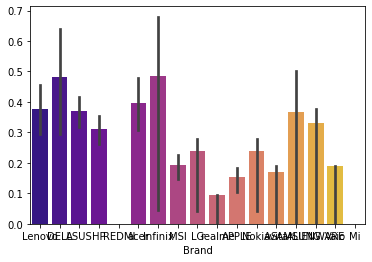

In [ ]:
##---------Type the code below this line------------------##
import seaborn as sns
import numpy as np

sns.barplot(x ='Brand', y = rating_values_list, data = df, palette ='plasma', estimator = np.std)

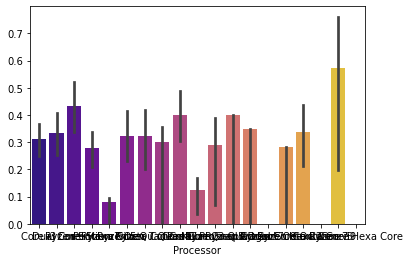

In [ ]:
sns.barplot(x ='Processor', y = rating_values_list, data = df, palette ='plasma', estimator = np.std)

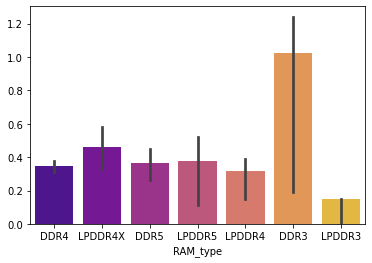

In [ ]:
sns.barplot(x ='RAM_type', y = rating_values_list, data = df, palette ='plasma', estimator = np.std)

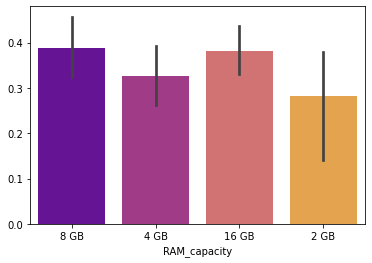

In [ ]:
sns.barplot(x ='RAM_capacity', y = rating_values_list, data = df, palette ='plasma', estimator = np.std)

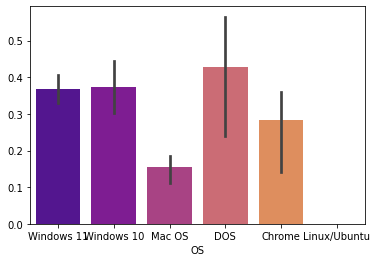

In [ ]:
sns.barplot(x ='OS', y = rating_values_list, data = df, palette ='plasma', estimator = np.std)

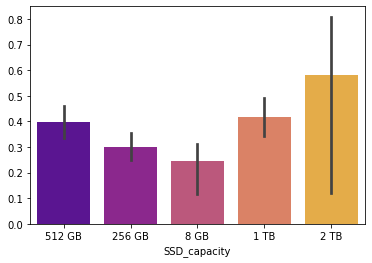

In [ ]:
sns.barplot(x ='SSD_capacity', y = rating_values_list, data = df, palette ='plasma', estimator = np.std)

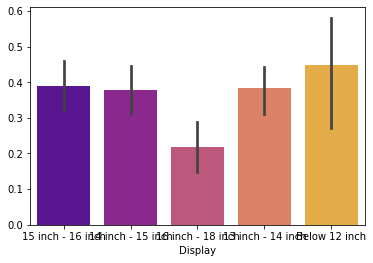

In [ ]:
sns.barplot(x ='Display', y = rating_values_list, data = df, palette ='plasma', estimator = np.std)

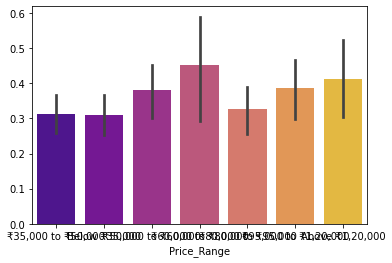

In [ ]:
sns.barplot(x ='Price_Range', y = rating_values_list, data = df, palette ='plasma', estimator = np.std)

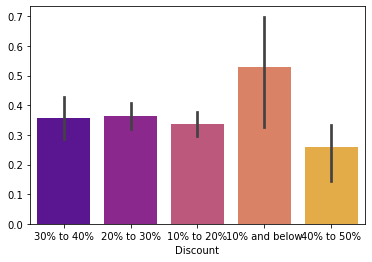

In [ ]:
sns.barplot(x ='Discount', y = rating_values_list, data = df, palette ='plasma', estimator = np.std)

In [ ]:
top_five_barplot = ['Price_Range', 'Discount', 'SSD_capacity', 'RAM_type', 'RAM_capacity']

Price_range, Discount, SSD_capacity, RAM_type and RAM_capacity attributes seem to be the most uniformly distributed

# 5. Data Wrangling and Inference



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

In [ ]:
# ##---------Type the code below this line------------------##
column_names = ['Brand', 'Processor', 'RAM_type', 'RAM_capacity', 'OS', 'SSD_capacity', 'Display', 'Price_Range', 'Discount']

In [ ]:
correlation = df.apply(lambda x: x.factorize()[0]).corr()
correlation

,Brand,Processor,RAM_type,RAM_capacity,OS,SSD_capacity,Display,Price_Range,Discount,Rating
Brand,1.000000,0.157526,-0.015992,0.014701,0.080653,0.075849,0.055832,0.128885,0.126893,0.116486
Processor,0.157526,1.000000,0.164525,0.516477,-0.017948,0.412625,0.145936,0.598232,0.012926,0.122255
RAM_type,-0.015992,0.164525,1.000000,0.192830,0.105184,0.175142,0.226061,0.270235,0.094303,-0.042820
RAM_capacity,0.014701,0.516477,0.192830,1.000000,-0.128573,0.302602,0.188745,0.612433,-0.004167,0.110288
OS,0.080653,-0.017948,0.105184,-0.128573,1.000000,0.037375,0.163160,0.005421,0.137389,-0.045774
SSD_capacity,0.075849,0.412625,0.175142,0.302602,0.037375,1.000000,0.133342,0.343306,-0.030777,-0.012366
Display,0.055832,0.145936,0.226061,0.188745,0.163160,0.133342,1.000000,0.227552,-0.031814,0.024926
Price_Range,0.128885,0.598232,0.270235,0.612433,0.005421,0.343306,0.227552,1.000000,0.148081,0.201516
Discount,0.126893,0.012926,0.094303,-0.004167,0.137389,-0.030777,-0.031814,0.148081,1.000000,0.060029
Rating,0.116486,0.122255,-0.042820,0.110288,-0.045774,-0.012366,0.024926,0.201516,0.060029,1.000000


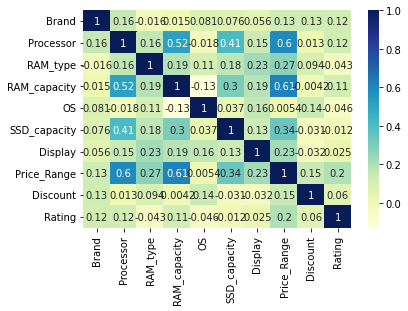

In [ ]:
import seaborn as sns
dataplot = sns.heatmap(correlation, cmap="YlGnBu", annot=True)

The features with high (magnitude close to 1) values wrt to the target variable (Rating) are considered significant.

In [ ]:
Feature_values_list = list(map(abs, correlation['Rating'].values.tolist()))
Feature_values_list_sorted = Feature_values_list.copy()
Feature_values_list_sorted.sort()

In [ ]:
top_five_correlation = []
print("Top 5 features, from the correlation heatmap, in increasing order of significance are")
for i in range(5):
  feature__ = column_names[Feature_values_list.index(Feature_values_list_sorted[-6:][i])]
  top_five_correlation.append(feature__)
  print(feature__)
top_five_correlation.reverse()

Top 5 features, from the correlation heatmap, in increasing order of significance are
Discount
RAM_capacity
Brand
Processor
Price_Range


## 5.2 Univariate Filters – Identifying top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score

1. Information Gain

In [ ]:
##---------Type the code below this line------------------##
def compute_impurity(feature, impurity_criterion):

    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))        
    return(round(impurity, 3))

In [ ]:
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):

    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
            
    target_entropy = compute_impurity(df[target], split_criterion)

    entropy_list = []
    weight_list = []
    
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)

In [ ]:
info_gain_list = []
for feature in df.drop(columns='Rating').columns:
    info_gain_list.append(comp_feature_information_gain(df, 'Rating', feature, 'entropy'))

target feature: Rating
descriptive_feature: Brand
information gain: 0.10943399999999981
target feature: Rating
descriptive_feature: Processor
information gain: 0.11886000000000019
target feature: Rating
descriptive_feature: RAM_type
information gain: 0.0384910000000005
target feature: Rating
descriptive_feature: RAM_capacity
information gain: 0.027286000000000143
target feature: Rating
descriptive_feature: OS
information gain: 0.05521100000000079
target feature: Rating
descriptive_feature: SSD_capacity
information gain: 0.02477499999999999
target feature: Rating
descriptive_feature: Display
information gain: 0.020566000000000084
target feature: Rating
descriptive_feature: Price_Range
information gain: 0.07481600000000022
target feature: Rating
descriptive_feature: Discount
information gain: 0.019781000000000493


In [ ]:
info_gain_table = pd.DataFrame(list(zip(column_names, info_gain_list)), 
                  columns =['Attribute', 'Info_gain'])
info_gain_table = info_gain_table.sort_values(by = 'Info_gain', ascending=False)
top_five_info_gain = info_gain_table['Attribute'].tolist()[:5]
display(info_gain_table )

,Attribute,Info_gain
1,Processor,0.118860
0,Brand,0.109434
7,Price_Range,0.074816
4,OS,0.055211
2,RAM_type,0.038491
3,RAM_capacity,0.027286
5,SSD_capacity,0.024775
6,Display,0.020566
8,Discount,0.019781


Higher Information gain indicates purity of split data.



2. Gini Index

In [ ]:
import numpy as np

def calculate_gini_index(column_name):
  probs = df[column_name].value_counts(normalize=True)
  entropy = -1 * np.sum(np.log2(probs) * probs)
  gini_index = 1 - np.sum(np.square(probs))
  return gini_index

In [ ]:
gini_indices = []

for column_name in column_names:
  gini_indices.append(calculate_gini_index(column_name))

gini_index_table = pd.DataFrame(list(zip(column_names, gini_indices)), 
                  columns =['Attribute', 'Gini_Index'])
gini_index_table = gini_index_table.sort_values(by = 'Gini_Index')
top_five_gini_index = gini_index_table['Attribute'].tolist()[:5]
display(gini_index_table)

,Attribute,Gini_Index
2,RAM_type,0.260487
4,OS,0.534021
3,RAM_capacity,0.558875
5,SSD_capacity,0.571458
6,Display,0.609591
8,Discount,0.730525
1,Processor,0.802623
0,Brand,0.814493
7,Price_Range,0.833465


Gini Index closer to zero represents purity, which is a favourable metric for a significant feature. 


4. Chi-Squared test

In [ ]:
from scipy import stats
from scipy.stats import chi2

def chi_sqaure_test(attribute_column_name, target_variable_name):
  crosstab = pd.crosstab(df[attribute_column_name], df[target_variable_name])
  chi_squared_value = stats.chi2_contingency(crosstab)[0]
  critical_chi_sqaured_value = chi2.ppf(stats.chi2_contingency(crosstab)[1], stats.chi2_contingency(crosstab)[2])
  return (critical_chi_sqaured_value - chi_squared_value)

In [ ]:
chi_sqaure_test_results = []

for column_name in column_names:
  chi_sqaure_test_results.append(chi_sqaure_test(column_name, 'Rating'))

chi_square_test_table = pd.DataFrame(list(zip(column_names, chi_sqaure_test_results)), 
                  columns =['Attribute', 'Chi_Sqaure_test_result'])
chi_square_test_table = chi_square_test_table.sort_values(by = 'Chi_Sqaure_test_result', ascending=False)
top_five_chi_square = chi_square_test_table['Attribute'].tolist()[:5]
display(chi_square_test_table)

,Attribute,Chi_Sqaure_test_result
8,Discount,-5.212479
5,SSD_capacity,-5.644993
6,Display,-5.779018
2,RAM_type,-21.674989
3,RAM_capacity,-21.974814
4,OS,-54.382851
0,Brand,-63.227729
7,Price_Range,-75.656401
1,Processor,-78.133325


More positive the difference (critical_chi_sqaured_value - chi_squared_value), more significant the feature



## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features

In [ ]:
##---------Type the code below this line------------------##
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, min_samples_split=40, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=6, min_samples_split=40)

In [ ]:
importances = tree.feature_importances_
importances_ = np.copy(importances)
top_five_DTC = []
for k in range(5):
  top_five_DTC.append(column_names[np.argmax(importances_)])
  importances_[np.argmax(importances_)] = 0
print("The top 5 significant features according to Decision Tree Classifier are", top_five_DTC[0],",", top_five_DTC[1], ",", top_five_DTC[2], ",", top_five_DTC[3], ",", top_five_DTC[4])

The top 5 significant features according to Decision Tree Classifier are Price_Range , Processor , Brand , OS , Discount


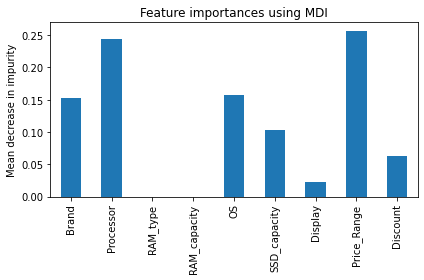

In [ ]:
std = np.std([tree.feature_importances_], axis=0)
forest_importances = pd.Series(importances, index=column_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [ ]:
##---------Type the code below this line------------------##
! pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
tree_ = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, min_samples_split=40, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                               max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [ ]:
sfs1 = SFS(tree_, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X, y, custom_feature_names=column_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-07-03 08:19:58] Features: 1/5 -- score: 0.28327228327228327[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2022-07-03 08:19:58] Features: 2/5 -- score: 0.3199023199023199[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-07-03 08:19:58] Features: 3/5 -- score: 0.3321123321123321[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [ ]:
sfs1.subsets_

{1: {'avg_score': 0.28327228327228327,
  'cv_scores': array([0.28327228]),
  'feature_idx': (0,),
  'feature_names': ('Brand',)},
 2: {'avg_score': 0.3199023199023199,
  'cv_scores': array([0.31990232]),
  'feature_idx': (0, 7),
  'feature_names': ('Brand', 'Price_Range')},
 3: {'avg_score': 0.3321123321123321,
  'cv_scores': array([0.33211233]),
  'feature_idx': (0, 1, 7),
  'feature_names': ('Brand', 'Processor', 'Price_Range')},
 4: {'avg_score': 0.33577533577533575,
  'cv_scores': array([0.33577534]),
  'feature_idx': (0, 1, 4, 7),
  'feature_names': ('Brand', 'Processor', 'OS', 'Price_Range')},
 5: {'avg_score': 0.33577533577533575,
  'cv_scores': array([0.33577534]),
  'feature_idx': (0, 1, 2, 4, 7),
  'feature_names': ('Brand', 'Processor', 'RAM_type', 'OS', 'Price_Range')}}

In [ ]:
top_five_sfs = list(sfs1.k_feature_names_)
print(top_five_sfs)

['Brand', 'Processor', 'RAM_type', 'OS', 'Price_Range']


## 5.5 Conclude the top 3 significant features with necessary justifications.

In [ ]:
print(column_names)
print(top_five_barplot)
print(top_five_correlation)
print(top_five_info_gain)
print(top_five_gini_index)
print(top_five_chi_square)
print(top_five_DTC)
print(top_five_sfs)

['Brand', 'Processor', 'RAM_type', 'RAM_capacity', 'OS', 'SSD_capacity', 'Display', 'Price_Range', 'Discount']
['Price_Range', 'Discount', 'SSD_capacity', 'RAM_type', 'RAM_capacity']
['Price_Range', 'Processor', 'RAM_capacity', 'Brand', 'OS']
['Processor', 'Price_Range', 'Brand', 'OS', 'RAM_capacity']
['RAM_type', 'OS', 'RAM_capacity', 'SSD_capacity', 'Display']
['Discount', 'Display', 'RAM_type', 'SSD_capacity', 'RAM_capacity']
['Price_Range', 'Processor', 'OS', 'Brand', 'SSD_capacity']
['Brand', 'Processor', 'RAM_type', 'OS', 'Price_Range']


In [ ]:
Scores = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for att in column_names:
  if att in top_five_barplot:
    Scores[column_names.index(att)] += 1
  if att in top_five_correlation:
    Scores[column_names.index(att)] += 1
  if att in top_five_info_gain:
    Scores[column_names.index(att)] += 1
  if att in top_five_gini_index:
    Scores[column_names.index(att)] += 1
  if att in top_five_chi_square:
    Scores[column_names.index(att)] += 1
  if att in top_five_DTC:
    Scores[column_names.index(att)] += 1
  if att in top_five_sfs:
    Scores[column_names.index(att)] += 1

In conclusion, the top three significant features are - 



In [ ]:
scorecard = pd.DataFrame(list(zip(column_names, Scores)), 
                  columns =['Attribute', 'Score'])
scorecard = scorecard.sort_values(by = 'Score', ascending=False)
display(scorecard)

,Attribute,Score
3,RAM_capacity,5
4,OS,5
7,Price_Range,5
0,Brand,4
1,Processor,4
2,RAM_type,4
5,SSD_capacity,4
6,Display,2
8,Discount,2


This has been decided based on the reults obtained from barplot, correlation, univariate filters, decision tree classifer and SequentialFeatureSelector